In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist['data'], mnist['target']

In [29]:
import numpy as np

5


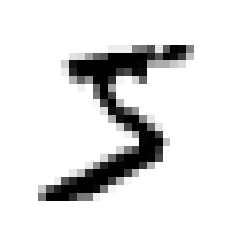

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

someDigit = X.iloc[0].to_numpy()
someDigitImage = someDigit.reshape(28,28)

plt.imshow(someDigitImage, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')

print(y[0])

In [30]:
y =  y.astype(np.uint8)

### Split data

In [31]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary Classifier

In [32]:
#Train on 5 only

y_train5 = (y_train==5)
y_test5 = (y_test == 5)


In [35]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train5)

SGDClassifier(random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train5, cv=3)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train5, y_train_pred))
print(recall_score(y_train5, y_train_pred))

0.8370879772350012
0.6511713705958311


### Multilclass classification

In [47]:
sgd_clf.fit(X_train, y_train)


AttributeError: 'SGDClassifier' object has no attribute 'decusiob_function'

In [50]:
print(sgd_clf.decision_function([someDigit]))
print(np.argmax(sgd_clf.decision_function([someDigit])))

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
3


In [51]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)

print(ovo_clf.predict([someDigit]))

[5]


## Multilabel Classification

In [54]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([someDigit])

array([[False,  True]])

##  Noise Removal

In [55]:
noise = np.random.randint(0,100, (len(X_train), 28*28))
X_train_noisy = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 28*28))
X_test_noisy = X_test + noise

y_train_noisy = X_train
y_test_noisy = X_test

In [58]:
knn_clf.fit(X_train_noisy, y_train_noisy)


NameError: name 'plot_digit' is not defined

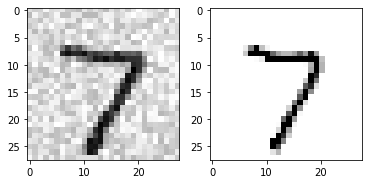

In [63]:
noisy_digit = X_test_noisy.iloc[0].to_numpy()
clean_digit = knn_clf.predict([noisy_digit])

plt.subplot(1,2,1)
plt.imshow(noisy_digit.reshape(28,28), cmap = mpl.cm.binary, interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(clean_digit.reshape(28,28), cmap = mpl.cm.binary, interpolation='nearest')

# Excercises

## Ex-1

In [67]:
from sklearn.model_selection import GridSearchCV

search_params = [
    {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,21]}
]

grid_search = GridSearchCV(KNeighborsClassifier(), search_params)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 7, 11, 21, 51, 101],
                          'weights': ['uniform', 'distance']}])

In [88]:
print(grid_search.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [85]:
cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

array([0.9704, 0.9689, 0.9687])

In [124]:
import pandas as pd
from scipy.ndimage.interpolation import shift

def augmentDataset(X, y):
    x_augmented = np.zeros(shape=(len(y)*5, 28*28))
    y_augmented = np.zeros(shape=len(y)*5, dtype=np.uint8)
    for index,row in X.iterrows():
        x_image = row.to_numpy().reshape(28,28)

        x_augmented[index*5, :] = shift(x_image,[1,0], cval=0).flatten()
        x_augmented[index*5+1, :] = shift(x_image,[-1,0], cval=0).flatten()
        x_augmented[index*5+2, :] = shift(x_image,[0,1], cval=0).flatten()
        x_augmented[index*5+3, :] = shift(x_image,[0,-1], cval=0).flatten()
        x_augmented[index*5+4, :] = row.to_numpy()
        y_augmented[index*5:index*5+5] = np.repeat(y[index], 5)
    
    permutation = np.random.permutation(len(y_augmented))    
    augmented_df = pd.DataFrame(x_augmented)
    augmented_df = augmented_df.reindex(permutation)
    
    return pd.DataFrame(augmented_df), y_aug[permutation]

X_aug, y_aug = augmentDataset(X_train, y_train)


In [125]:
cross_val_score(grid_search.best_estimator_, X_aug, y_aug, cv=3, scoring='accuracy')

array([0.98362, 0.98262, 0.98269])

## Ex-3 done in R

## Ex - 4 Spam Classifier

In [1]:
import tarfile 

UNCOMPRESS_DIR = './datasets/spam/Uncompressed/'

files = ['./datasets/spam/20021010_easy_ham.tar.bz2',
        './datasets/spam/20021010_hard_ham.tar.bz2',
        './datasets/spam/20021010_spam.tar.bz2',
        './datasets/spam/20030228_easy_ham.tar.bz2',
        './datasets/spam/20030228_easy_ham_2.tar.bz2',
        './datasets/spam/20030228_hard_ham.tar.bz2',
        './datasets/spam/20030228_spam.tar.bz2',
        './datasets/spam/20030228_spam_2.tar.bz2',
        './datasets/spam/20050311_spam_2.tar.bz2'] 




In [ ]:
for f in files:
    print('Uncompressing: ', f)
    tar = tarfile.open(f, 'r:bz2')
    tar.extractall('./datasets/spam/Uncompressed/')
    tar.close()

In [2]:
import os
import pandas as pd
import numpy as np

df = pd.DataFrame(columns = ['RawData', 'isSpam'])

for root, dirs, files in os.walk(UNCOMPRESS_DIR):
    for d in dirs:
        for root2, dirs2, files2 in os.walk(UNCOMPRESS_DIR + '/' + d):
            for f in files2: 
                isSpam = 0
                if(d.__contains__('spam')):
                    isSpam = 1
                try:
                    data = open(UNCOMPRESS_DIR + '/' + d + '/' + f, 'r').read()
                    df = df.append({'RawData': data, 'isSpam':isSpam}, ignore_index=True)
                    df.head()
                except:
                    print(f)
                    continue

00116.29e39a0064e2714681726ac28ff3fdef
00263.13fc73e09ae15e0023bdb13d0a010f2d
00320.20dcbb5b047b8e2f212ee78267ee27ad
00323.9e36bf05304c99f2133a4c03c49533a9
00324.6f320a8c6b5f8e4bc47d475b3d4e86ef
00500.85b72f09f6778a085dc8b6821965a76f
0123.68e87f8b736959b1ab5c4b5f2ce7484a
0273.51c482172b47ce926021aa7cc2552549
0330.a4df526233e524104c3b3554dd8ab5a8
0334.3e4946e69031f3860ac6de3d3f27aadd
0335.9822e1787fca0741a8501bdef7e8bc79
01065.9ecef01b01ca912fa35453196b4dae4c
01227.04a4f94c7a73b29cb56bf38c7d526116
01376.73e738e4cd8121ce3dfb42d190b193c9


In [3]:
df.head()

,RawData,isSpam
0,From exmh-workers-admin@redhat.com Thu Aug 22...,0
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,0
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,0
3,From irregulars-admin@tb.tf Thu Aug 22 14:23:...,0
4,From Stewart.Smith@ee.ed.ac.uk Thu Aug 22 14:...,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.RawData
y = df.isSpam

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X,y):    
    X_train = X[train_index]    
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


## Data-Preparation Pipeline

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
import string 
from email import parser
import email
import regex as re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,
                 toLowerCaseFlag=True,
                 removeHeadersFlag=True,
                 removePunctuationFlag=True,
                 replaceURLsFlag=True,
                 replaceNumbersFlag=True,
                 doStemmingFlag=False,
                 removeNewLinesFlag=True):
        self.toLowerCaseFlag = toLowerCaseFlag
        self.removeHeadersFlag = removeHeadersFlag
        self.removePunctuationFlag = removePunctuationFlag
        self.replaceURLsFlag = replaceURLsFlag
        self.doStemmingFlag = doStemmingFlag
        self.replaceNumbersFlag = replaceNumbersFlag
        self.removeNewLinesFlag = removeNewLinesFlag

    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        XX = np.array(X, copy=True)
        for i in range(0,len(XX)):
            if(self.removeHeadersFlag):
                try:
                    XX[i] = self.removeHeaders(XX[i])
                except:
                    print(i)
                    print(X[i])
                    print(self.removeHeaders(XX[i]))
            if(self.replaceURLsFlag):
                XX[i] = self.replaceURLs(XX[i])
            if(self.replaceNumbersFlag):
                XX[i] = self.replaceNumbers(XX[i])
            if(self.removePunctuationFlag):
                XX[i] = self.removePunctuation(XX[i])
            if(self.toLowerCaseFlag):
                XX[i] = self.toLowerCase(XX[i])
            if(self.doStemmingFlag):
                XX[i] = self.stemEmail(XX[i])
            if(self.removeNewLinesFlag):
                XX[i] = self.removeNewLines(XX[i])

        return XX

    def toLowerCase(self, email):
        return email.lower()

    def removePunctuation(self, s):
        return s.translate(str.maketrans('', '', string.punctuation))

    def removeHeaders(self, s):
        msg = email.message_from_string(s)
        return_str = ''
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                return_str +=  part.get_payload()  + ' '# prints the raw text
        return return_str

    def replaceURLs(self, s):
        return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' URL ', s, flags=re.MULTILINE)

    def replaceNumbers(self, s):
        return re.sub('\d+', ' NUM ' , s, flags=re.MULTILINE)

    def removeNewLines(self, s):
        return re.sub('\n', ' ' , s, flags=re.MULTILINE)

    def stemEmail(self, s):
        ps = PorterStemmer()
        words = word_tokenize(s)
        return_str = ''
        for w in words:
            return_str += ps.stem(w) + ' '
        return return_str

In [6]:
dt = DataTransformer()

x_t = dt.transform(X_train)


In [7]:
x_t[1]

'url  url  date  num  num  num t num  num  num  num  num   you are not still using sourceforge are you if you have any hopes that they  are anything but yet another business giving away a free service then see  this selling microsoft visualstudio on the open source development platform  nice touch click on the image for the original screenshot    '

In [6]:
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer())
                                  ])

In [19]:
xhat = preprocessing_pipeline.fit_transform(X_train)


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC



print('SVC ', cross_val_score(SVC(), X=xxhat, y=y_train.values.astype(np.uint8), cv=3, scoring='precision',n_jobs=-1))


TypeError: Expected sequence or array-like, got <class 'sklearn.pipeline.Pipeline'>

In [12]:
type(y_train.values.astype(int))

numpy.ndarray

In [12]:
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

x_processed = preprocessing_pipeline.fit_transform(X_train)

print('KNN ', cross_val_score(KNeighborsClassifier(n_neighbors=15), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='precision'))
print('RF ', cross_val_score(RandomForestClassifier(), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='precision'))
print('SVC ', cross_val_score(SVC(), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='precision'))
print('SVC RBF ', cross_val_score(SVC(kernel='rbf'), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='precision'))
print('GNB ', cross_val_score(GaussianNB(), X=x_processed.toarray(), y=y_train.values.astype(np.uint8), cv=3, scoring='precision'))

print('KNN ', cross_val_score(KNeighborsClassifier(n_neighbors=15), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='recall'))
print('RF ', cross_val_score(RandomForestClassifier(), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='recall'))
print('SVC ', cross_val_score(SVC(), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='recall'))
print('SVC RBF ', cross_val_score(SVC(kernel='rbf'), X=x_processed, y=y_train.values.astype(np.uint8), cv=3, scoring='recall'))
print('GNB ', cross_val_score(GaussianNB(), X=x_processed.toarray(), y=y_train.values.astype(np.uint8), cv=3, scoring='recall'))



KeyboardInterrupt: 

In [7]:
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


knn_pipeline = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer()),
    ('estimator', KNeighborsClassifier())])

rf_pipeline  = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer()),
    ('estimator', RandomForestClassifier())])

svc_pipeline  = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer()),
    ('estimator', SVC())])

svc_rbf_pipeline  = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer()),
    ('estimator', SVC(kernel='rbf'))])

gnb_pipeline  = Pipeline([
    ('text_processing', DataTransformer()),
    ('text_vectorizer', TfidfVectorizer()),
    ('estimator', GaussianNB())])

In [8]:
import nltk
from nltk.corpus import stopwords

set(stopwords.words('english'))

svc_params = {
    #'text_processing__replaceNumbersFlag':[True, False],
    'text_processing__doStemmingFlag':[True, False],
    #'text_processing__removeHeadersFlag':[True, False],
    'text_processing__toLowerCaseFlag':[True, False],
    'text_vectorizer__lowercase':[False],
    #'text_processing__replaceNumbersFlag':[True,False],
    'text_vectorizer__max_df':[0.25,1],
    'text_vectorizer__min_df':[0.01,1],
    'text_vectorizer__max_features':[1000,10000, None],
    'text_vectorizer__stop_words':[stopwords.words('english'), None],
    'estimator__C' : [0.1,1.0,10.0],
    'estimator__kernel':['poly', 'rbf', 'sigmoid']
    }

In [ ]:
svc_pipeline.fit(X_train, y_train.values.astype(np.uint8))

In [9]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svc_pipeline, 
                           svc_params, 
                           cv=3, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True, 
                           n_jobs=5,
                           verbose=2)  


grid_search.fit(X_train, y_train.values.astype(np.uint8))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


c:\users\marko\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.2185322  -0.20768544 -0.21920181 -0.20835521 -0.22710233 -0.21933541
 -0.24116253 -0.240359   -0.22710233 -0.21933541 -0.24384061 -0.24303734
         nan         nan -0.24825887 -0.24892843         nan         nan
 -0.22656648 -0.22736969         nan         nan -0.22094254 -0.22094254
 -0.2185322  -0.20768544 -0.21906794 -0.20835516 -0.22696841 -0.21933541
 -0.24116253 -0.240359   -0.22696841 -0.21933541 -0.24384061 -0.24303734
         nan         nan -0.24825887 -0.24892843         nan         nan
 -0.22656648 -0.22736969         nan         nan -0.22094254 -0.22094254
 -0.22187994 -0.20956014 -0.22134473 -0.20862289 -0.22884316 -0.22362061
 -0.24303707 -0.24276923 -0.22884316 -0.22362061 -0.24571515 -0.24558128
         nan         nan -0.24892843 -0.24799113         nan         nan
 -0.22482565 -0.22482565 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('text_processing', DataTransformer()),
                                       ('text_vectorizer', TfidfVectorizer()),
                                       ('estimator', SVC())]),
             n_jobs=5,
             param_grid={'estimator__C': [0.1, 1.0, 10.0],
                         'estimator__kernel': ['poly', 'rbf', 'sigmoid'],
                         'text_processing__doStemmingFlag': [True, False],
                         'text_processing__toLowerCaseFlag': [True, False],
                         'text_vectorizer_...
                         'text_vectorizer__min_df': [0.01, 1],
                         'text_vectorizer__stop_words': [['i', 'me', 'my',
                                                          'myself', 'we', 'our',
                                                          'ours', 'ourselves',
                                                          'you', "you're",
                                  

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class Shifter(BaseEstimator, TransformerMixin):
    def __init__(self, amount=1):
        self.amount = amount
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X + self.amount

s = Shifter()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('shifter', Shifter()),
    ('svc', SVC())])

params = {
    'scaler__with_mean':[True, False],
    'scaler__with_std':[True, False],
    'shifter__amount':[-2,-1,0,1,2],
    'svc__kernel':['poly', 'rbf', 'sigmoid']
}

X = np.concatenate((np.random.normal(loc=-1,size=1000), np.random.normal(loc=1, size=1000)))
y = np.concatenate((np.repeat(0,1000), np.repeat(1,1000)))

idx = np.random.permutation(len(y))

cv = GridSearchCV(pipeline, params, 
                  cv=3,
                  scoring='neg_mean_squared_error',
                  return_train_score=True, 
                  n_jobs=1,
                  verbose=2)

cv.fit(X[idx].reshape(-1,1), y[idx])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=True, shifter__amount=-2, svc__kernel=sigmoid; total time=   0.1s
[CV] END scaler__with_mean=True

[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=2, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=True, scaler__with_std=False, shifter__amount=2, svc__kernel=po

[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=rbf; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=-1, svc__kernel=sigmoid; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=0, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=0, svc__kernel=poly; total time=   0.0s
[CV] END scaler__with_mean=False, scaler__with_std=False, shifter__amount=0,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('shifter', Shifter()),
                                       ('svc', SVC())]),
             n_jobs=1,
             param_grid={'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False],
                         'shifter__amount': [-2, -1, 0, 1, 2],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [11]:
print(cv.best_params_)

{'scaler__with_mean': True, 'scaler__with_std': True, 'shifter__amount': -2, 'svc__kernel': 'poly'}


In [13]:
print(grid_search.best_params_)

{'estimator__C': 10.0, 'estimator__kernel': 'rbf', 'text_processing__doStemmingFlag': False, 'text_processing__toLowerCaseFlag': True, 'text_vectorizer__lowercase': False, 'text_vectorizer__max_df': 0.25, 'text_vectorizer__max_features': 1000, 'text_vectorizer__min_df': 1, 'text_vectorizer__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'abo

In [17]:
from sklearn.model_selection import cross_val_score


print('Precision: ', cross_val_score(grid_search.best_estimator_, X=X_train, y=y_train.values.astype(np.uint8), cv=10, scoring='precision', n_jobs=5))
print('Recall: ', cross_val_score(grid_search.best_estimator_, X=X_train, y=y_train.values.astype(np.uint8), cv=10, scoring='recall', n_jobs=5))

Precision:  [0.88571429 0.90338164 0.87735849 0.91666667 0.92537313 0.90147783
 0.86255924 0.90384615 0.88151659 0.875     ]
Recall:  [0.97894737 0.97905759 0.97382199 0.97905759 0.97382199 0.95811518
 0.95287958 0.98429319 0.97894737 0.95789474]
